In [1]:
# CS671_DEEP_LEARNING
# Programming Assignment 2
# Course Instructor : Aditya Nigam (Assistant Professor)
# 18 March 2019
# Question-1
# Submitted By Group_06


# Used keras, tensorflow, matplotlib, pickle, sklearn
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
infile = open('line-data-input/X1.pickle','rb')
x_data = pickle.load(infile)
infile.close()

infile = open('line-data-input/Y1.pickle','rb')
y_data = pickle.load(infile)
infile.close()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [5]:
image_index = 7777
y_test[image_index]

50

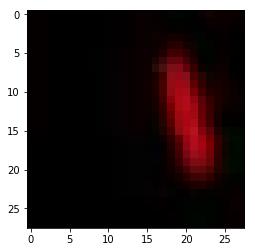

In [6]:
plt.imshow(x_data[image_index], cmap='Greys')

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 3)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)
x_test.shape

(19200, 28, 28, 3)

In [8]:
input_shape = (28, 28, 3)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB values
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (76800, 28, 28, 3)
Number of images in x_train 76800
Number of images in x_test 19200


In [10]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dense(97,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# model summary
summary = model.summary()
print(summary)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_2 (Dense)              (None, 97)                99425     
Total params: 6,527,841
Trainable params: 6,527,777
Non-trainable params: 64
_________________________________________________________________

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, np_utils.to_categorical(y_train), validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 57600 samples, validate on 19200 samples
Epoch 1/10
57600/57600 [==============================] - 501s 9ms/step - loss: 0.6525 - acc: 0.7921 - val_loss: 0.4001 - val_acc: 0.8841
Epoch 2/10
57600/57600 [==============================] - 556s 10ms/step - loss: 0.1913 - acc: 0.9385 - val_loss: 0.3250 - val_acc: 0.8996
Epoch 3/10
57600/57600 [==============================] - 611s 11ms/step - loss: 0.1397 - acc: 0.9591 - val_loss: 0.1911 - val_acc: 0.9501
Epoch 4/10
57600/57600 [==============================] - 665s 12ms/step - loss: 0.1036 - acc: 0.9711 - val_loss: 0.1174 - val_acc: 0.9689
Epoch 5/10
57600/57600 [==============================] - 695s 12ms/step - loss: 0.1003 - acc: 0.9748 - val_loss: 0.1476 - val_acc: 0.9655
Epoch 6/10
57600/57600 [==============================] - 655s 11ms/step - loss: 0.0744 - acc: 0.9806 - val_loss: 0.0694 - val_acc: 0.9783
Epoch 7/10
57600/57600 [==============================] - 631s 11ms/s

In [13]:
# Evaluating model
evaluate = model.evaluate(x_test,np_utils.to_categorical(y_test))
print(evaluate)

19200/19200 [==============================] - 12s 628us/step
[0.033324986812663916, 0.9926041666666666]


In [14]:
# save model
model.save('models/line_model_part1.h5')  # creates a HDF5 file

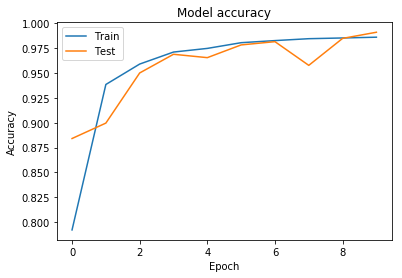

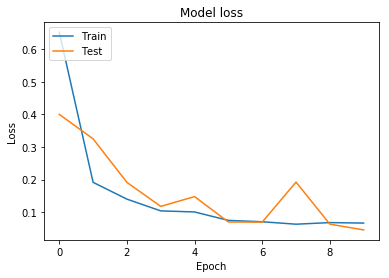

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('figures/part1/line_model_part1-training-validation-accurracy.png')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('figures/part1/line_model_part1-training-validation-loss.png')